In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
from tqdm import tqdm

In [29]:

c2 = 0.2

alpha = 1

def loss_function(a, y):
    return c2*(a-y)**2 -alpha



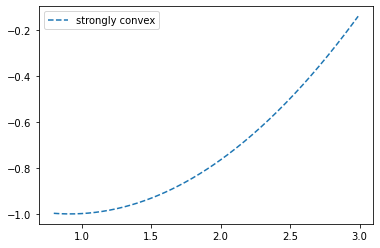

In [30]:
# evenly sampled time at 200ms intervals
thetas = np.arange(0.8, 3., 0.01)
y = np.random.normal(loc=1, scale=0.3)

# red dashes, blue squares and green triangles
plt.plot(thetas, loss_function(thetas, y), '--', label='strongly convex')
plt.legend()
plt.show()

In [31]:
import jax
import jax.numpy as jnp
import jaxopt

def pdf(loc, x):
    scale = logging_scale
    return 1/(scale * jnp.sqrt(2*jnp.pi)) * jnp.exp(-((x - loc)/scale)**2/2)

def evaluate_theta(theta, random_seed=42):
    rng = np.random.RandomState(random_seed)
    size=10000
    actions = rng.normal(loc=theta, scale=0.3, size=size)
    y = rng.normal(loc=1, scale=0.3, size=size)
    loss = np.mean(c2*(actions-y)**2 -alpha)
    return loss

# Experiment

In [32]:
def ratio(theta, beta):
    variance = (np.exp((theta-optimal_theta)**2)-1)
    delta = (theta-optimal_theta)**2
    return variance/delta**beta


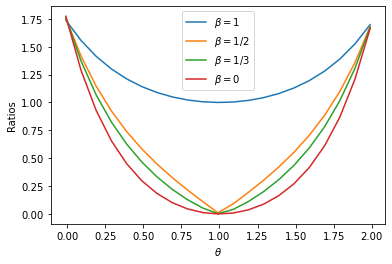

In [33]:
thetas = np.arange(optimal_theta-1.01, optimal_theta+1.01, 0.1)
plt.plot(thetas, ratio(thetas, beta=1), label=r'$\beta=1$')
plt.plot(thetas, ratio(thetas, beta=0.5), label=r'$\beta=1/2$')
plt.plot(thetas, ratio(thetas, beta=1/3), label=r'$\beta=1/3$')
plt.plot(thetas, ratio(thetas, beta=0), label=r'$\beta=0$')
#plt.ylim(0, 10)
plt.xlabel(r'$\theta$')
plt.ylabel("Ratios")
plt.legend()
plt.savefig('heb_evaluation.pdf')